### Time series data structures

Creating a time series DataFrame for daily weather

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from pandas import *

In [140]:
delhi_daily_weather = pd.read_csv('DailyDelhiClimateTrain.csv')
delhi_daily_weather.shape

(1462, 5)

In [141]:
delhi_daily_weather.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


In [142]:
delhi_daily_weather.tail(3)

,date,meantemp,humidity,wind_speed,meanpressure
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [143]:
delhi_daily_weather.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

We see something is wrong with the data type of the `date` column, we convert it using `to_datetime()` function.

In [144]:
delhi_daily_weather['date'] = pd.to_datetime(delhi_daily_weather['date'])
delhi_daily_weather.dtypes

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object

Now everything looks great, we set the `index` to be the `date` column

In [145]:
delhi_daily_weather = delhi_daily_weather.set_index('date')
delhi_daily_weather.tail(3)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [146]:
delhi_daily_weather.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [147]:
# Add columns with year, month, and weekday name
delhi_daily_weather['Year'] = delhi_daily_weather.index.year
delhi_daily_weather['Month'] = delhi_daily_weather.index.month
delhi_daily_weather['Weekday Name'] = delhi_daily_weather.index.day_name()
# Display a random sampling of 5 rows
delhi_daily_weather.sample(5, random_state=0)

,meantemp,humidity,wind_speed,meanpressure,Year,Month,Weekday Name
date,,,,,,,
2014-06-15,33.875000,52.000000,8.100000,997.125000,2014,6,Sunday
2016-05-11,32.500000,49.937500,7.775000,1006.062500,2016,5,Wednesday
2014-04-05,27.375000,44.000000,9.262500,1008.875000,2014,4,Saturday
2013-10-07,29.714286,66.571429,1.585714,1008.857143,2013,10,Monday
2014-10-20,24.750000,55.625000,4.400000,1013.125000,2014,10,Monday


### Time based indexing
Using `loc` accessor

In [149]:
delhi_daily_weather.loc['2015-01-11']

meantemp             11
humidity          80.75
wind_speed       4.8625
meanpressure    1019.12
Year               2015
Month                 1
Weekday Name     Sunday
Name: 2015-01-11 00:00:00, dtype: object

In [150]:
# Slice of days
delhi_daily_weather.loc['2014-01-20':'2014-01-22']

,meantemp,humidity,wind_speed,meanpressure,Year,Month,Weekday Name
date,,,,,,,
2014-01-20,14.625000,83.500000,4.412500,1021.375000,2014,1,Monday
2014-01-21,13.571429,96.857143,7.171429,1020.571429,2014,1,Tuesday
2014-01-22,15.250000,96.125000,6.712500,1019.875000,2014,1,Wednesday


In [152]:
# Partial-string indexing
delhi_daily_weather.loc['2016-03']

,meantemp,humidity,wind_speed,meanpressure,Year,Month,Weekday Name
date,,,,,,,
2016-03-01,24.916667,57.416667,1.700000,1015.000000,2016,3,Tuesday
2016-03-02,24.933333,57.066667,1.733333,1015.400000,2016,3,Wednesday
2016-03-03,26.000000,55.615385,4.292308,1014.615385,2016,3,Thursday
2016-03-04,27.312500,44.250000,6.143750,1012.687500,2016,3,Friday
2016-03-05,23.933333,57.133333,11.000000,1012.666667,2016,3,Saturday
2016-03-06,22.812500,66.562500,5.218750,1013.062500,2016,3,Sunday
2016-03-07,23.714286,64.142857,5.171429,1012.357143,2016,3,Monday
2016-03-08,23.428571,60.214286,6.742857,1011.642857,2016,3,Tuesday
2016-03-09,24.000000,57.562500,9.375000,1012.062500,2016,3,Wednesday


### Visualizing time series data

Use `seaborn` package

In [153]:
# # Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(14, 7)})

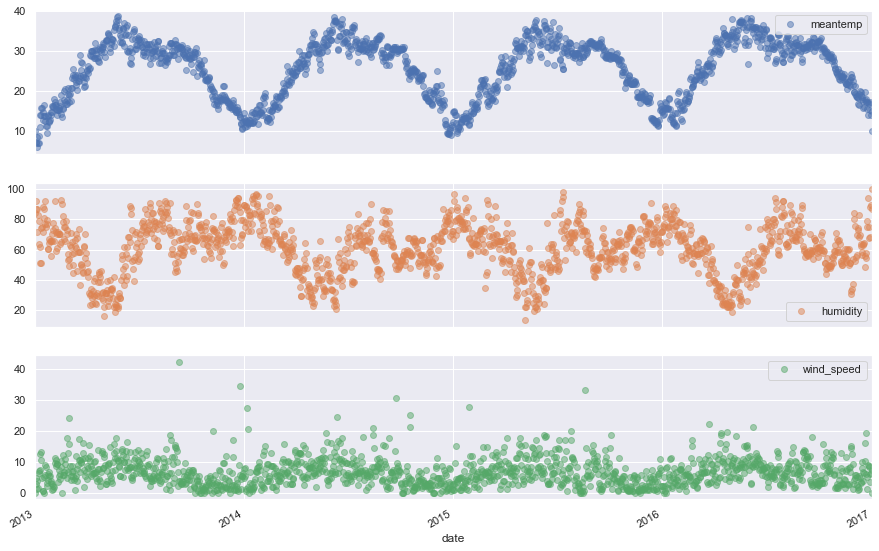

In [158]:
# Consider the meantemp, humidity and wind_speed time series
cols_plot = ['meantemp', 'humidity', 'wind_speed']
axes = delhi_daily_weather[cols_plot].plot(marker='o', figsize=(15,10),alpha=0.5, linestyle='None', subplots=True)
# for ax in axes:
#     ax.set_ylabel('Daily Totals (GWh)')

Considering the patterns of the figures shown above it is clear that `meantemp` and `wind_speed` are inversely proportional to `humidity` in the sense that, when they increase simultaneously the amount of humidity decreases. However, the wind speed seems not to vary too much with little outliers having more than $25km/h$

Text(0.5, 1.0, '2013 - 2017 Mean Temperature')

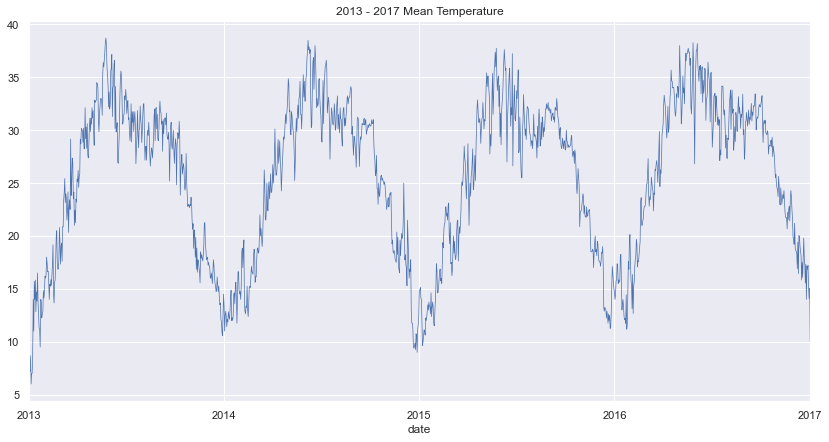

In [163]:
# Consider temperature parameter only
delhi_daily_weather['meantemp'].plot(linewidth=0.7);
plt.title('2013 - 2017 Mean Temperature')

The figure above shows that, some periods of the year (perhaps summer time i.e., May to October) have temperature higher than $30^\circ$C.

Text(0.5, 1.0, '2015 Mean Temperature')

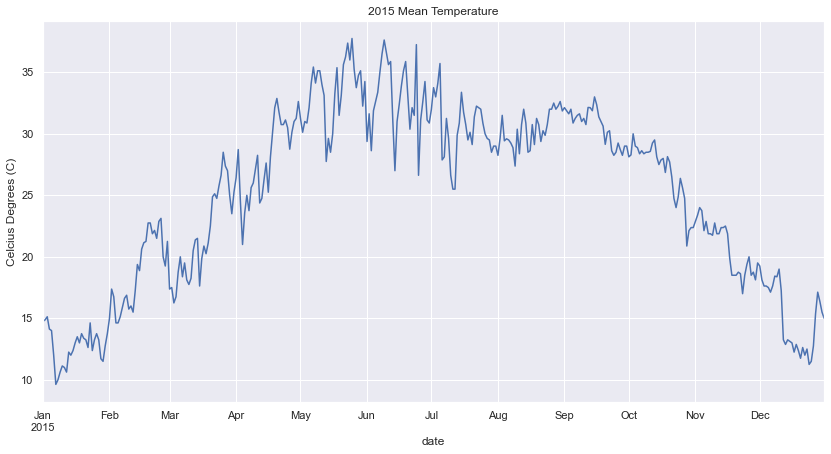

In [164]:
# Monthly temperature in 2015
ax = delhi_daily_weather.loc['2015', 'meantemp'].plot()
ax.set_ylabel('Celcius Degrees (C)')
plt.title('2015 Mean Temperature')

As we guessed earlier, the temperature rises beyond $30^\circ$C between May and October, and it goes below $15^\circ$ in January and December.

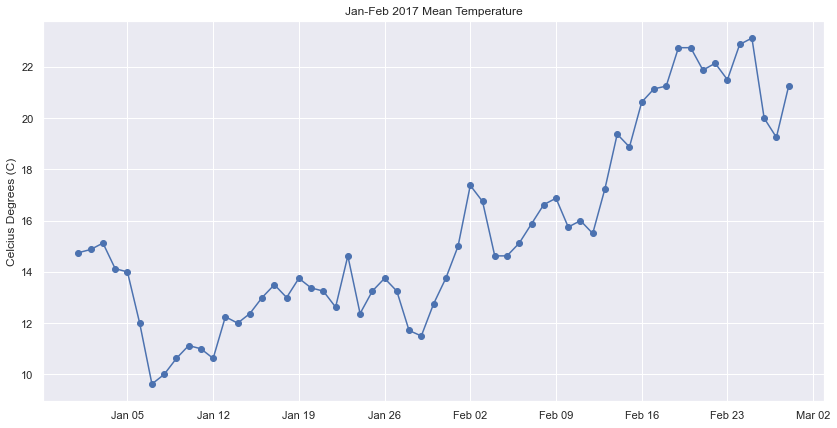

In [159]:
fig, ax = plt.subplots()
ax.plot(delhi_daily_weather.loc['2015-01':'2015-02', 'meantemp'], marker='o', linestyle='-')
ax.set_ylabel('Celcius Degrees (C)')
ax.set_title('Jan-Feb 2017 Mean Temperature')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

The production of electricity was below 400 GWh in the mid of Jan to mid of Feb 2017.

### Seasonality
Yearly consumption and production

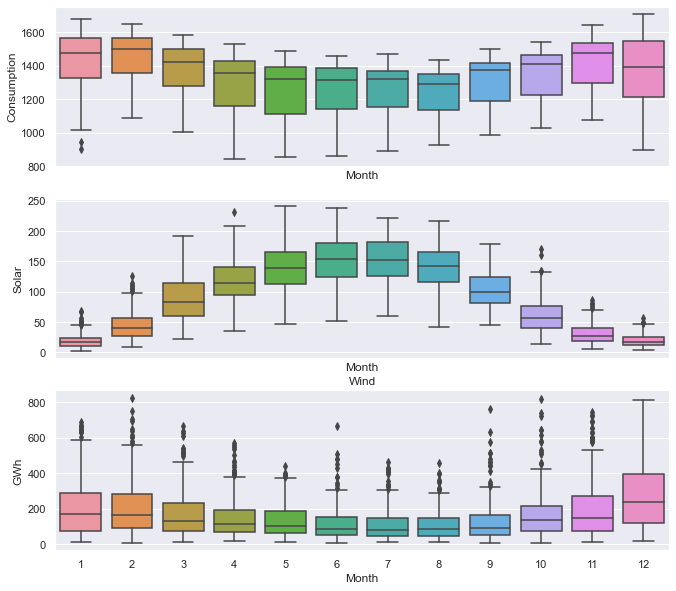

In [61]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
ax.set_ylabel('GWh')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

Weekly consumption and production

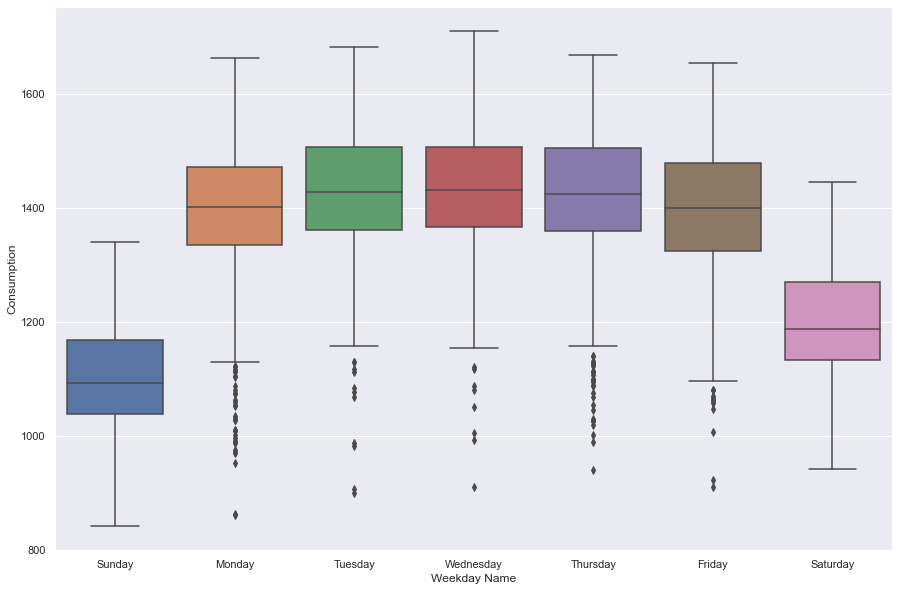

In [62]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption')

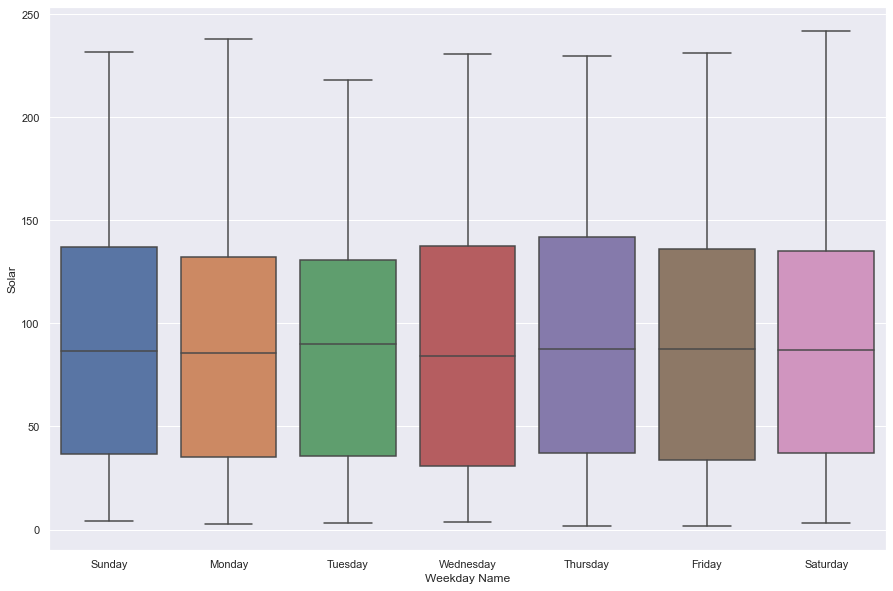

In [63]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Solar')

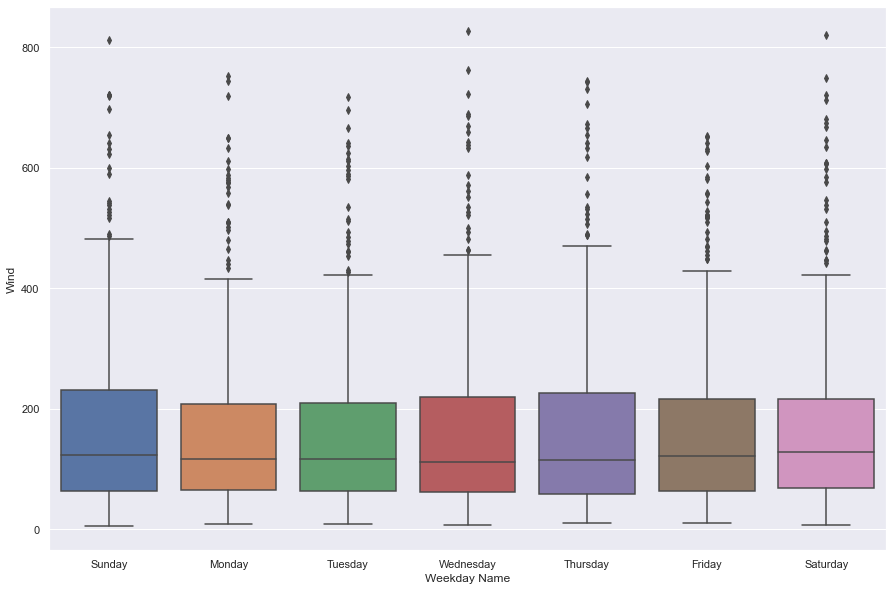

In [64]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Wind')

### Frequencies

In [65]:
# pd.date_range('1998-03-10', '1998-03-15', freq='D')

In [66]:
# pd.date_range('2004-09-20', periods=12, freq='H')

In [67]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [68]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [69]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


### Resampling
Using `resample()` method and apply aggregation methods `mean()`, `mode()`, `median()`, etc

In [70]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [71]:
opsd_weekly_mean.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571
2017-12-31,1203.265211,604.699143,19.240143,623.939286


In [72]:
# Comparing the rows after resampling the data on weekly mean
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


Let’s plot the daily and weekly Solar time series together over a single six-month period to compare them.

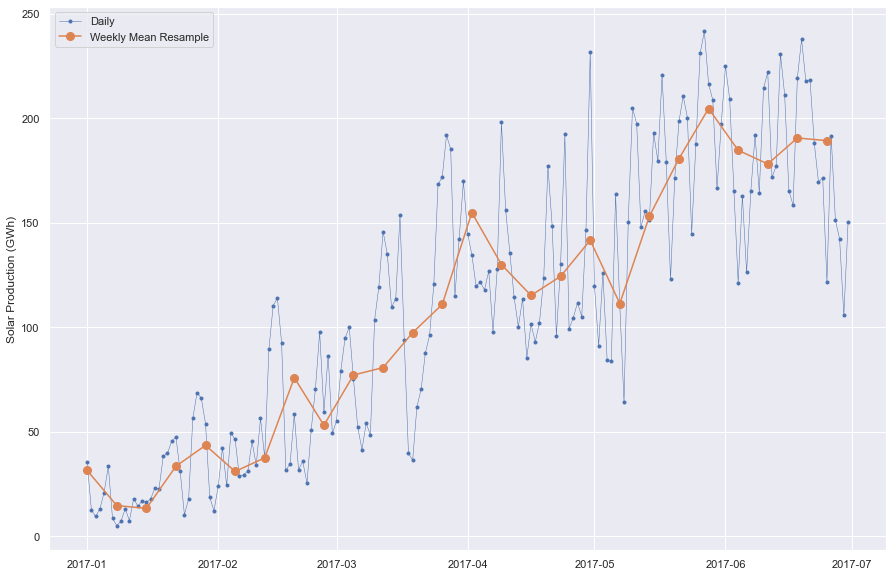

In [73]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [74]:
# Compute the monthly sums, setting the value to NaN for any month which has fewer than 28 days of data
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


In [75]:
opsd_monthly.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-10-31,42355.21893,12480.097,2130.557,14610.654
2017-11-30,44339.72455,10259.001,831.044,11090.045
2017-12-31,44511.10431,14725.436,494.171,15219.607


Now let’s explore the monthly time series by plotting the electricity consumption as a line plot, and the wind and solar power production together as a stacked area plot.

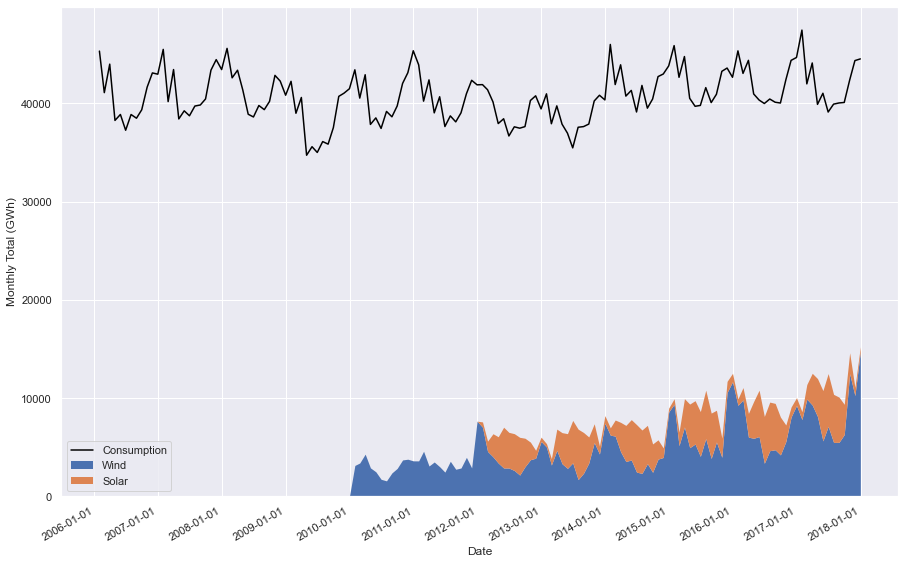

In [76]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

Let’s explore this further by resampling to annual frequency and computing the ratio of `Wind+Solar` to `Consumption` for each year.

In [77]:
# Compute the annual sums, setting the value to NaN for any year which has fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Ratio'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Ratio
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


Finally, let’s plot the `wind + solar` share of annual electricity `consumption` as a bar chart.

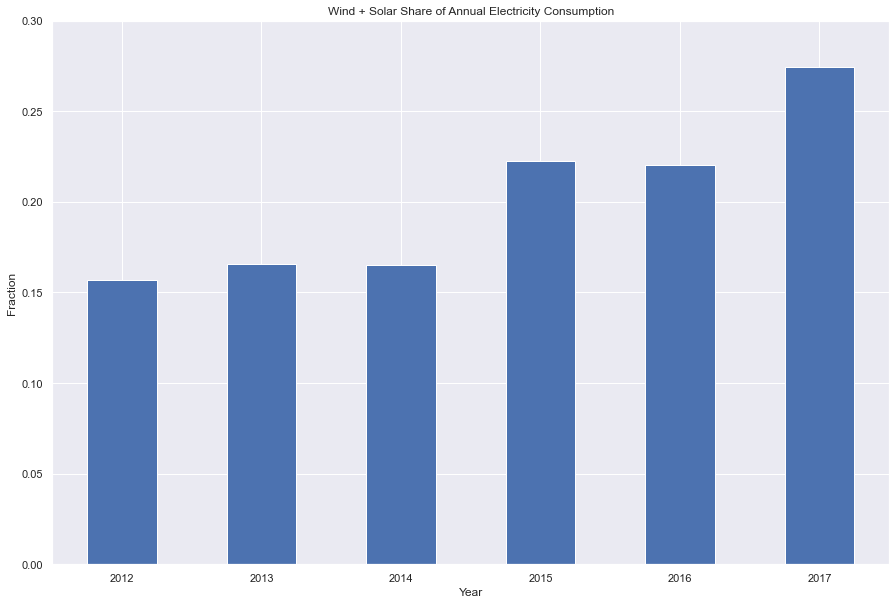

In [78]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = opsd_annual.loc[2012:, 'Ratio'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0);

### Rolling Windows
Let’s use the `rolling()` method to compute the 7-day rolling mean of our daily data.

In [79]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


To visualize the differences between rolling mean and resampling, let’s update our earlier plot of January-June 2017 solar power production to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.

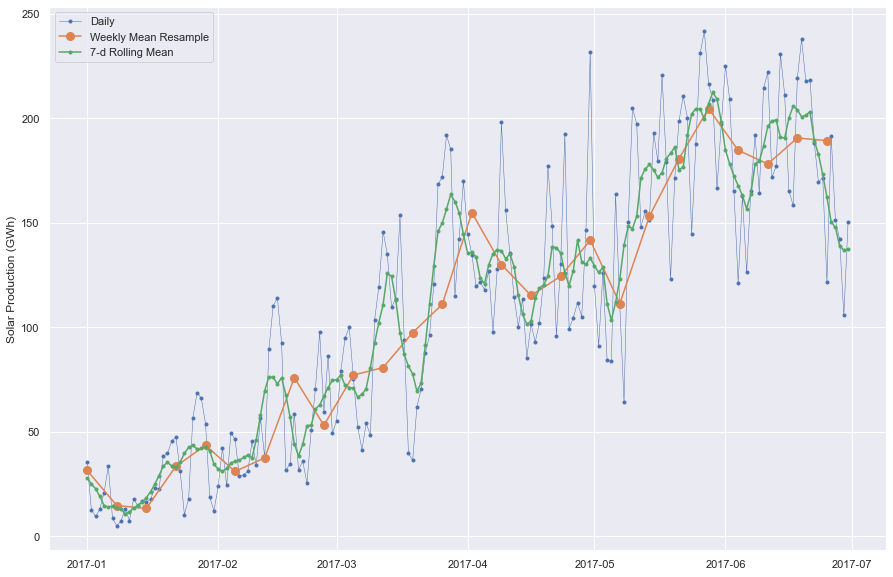

In [80]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
        marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

We’ve already computed 7-day rolling means, so now let’s compute the 365-day rolling mean of our OPSD data.

In [81]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()
opsd_365d.tail(400)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2016-11-27,1386.267962,220.920425,98.836112,319.756537
2016-11-28,1387.136767,220.626011,99.065638,319.691649
2016-11-29,1387.210293,220.534170,99.189732,319.723901
2016-11-30,1387.218126,221.076419,99.342644,320.419063
2016-12-01,1387.152427,220.840304,99.687493,320.527797
...,...,...,...,...
2017-12-27,NaN,NaN,NaN,NaN
2017-12-28,NaN,NaN,NaN,NaN
2017-12-29,NaN,NaN,NaN,NaN


Let’s plot the 7-day and 365-day rolling mean electricity consumption, along with the daily time series.

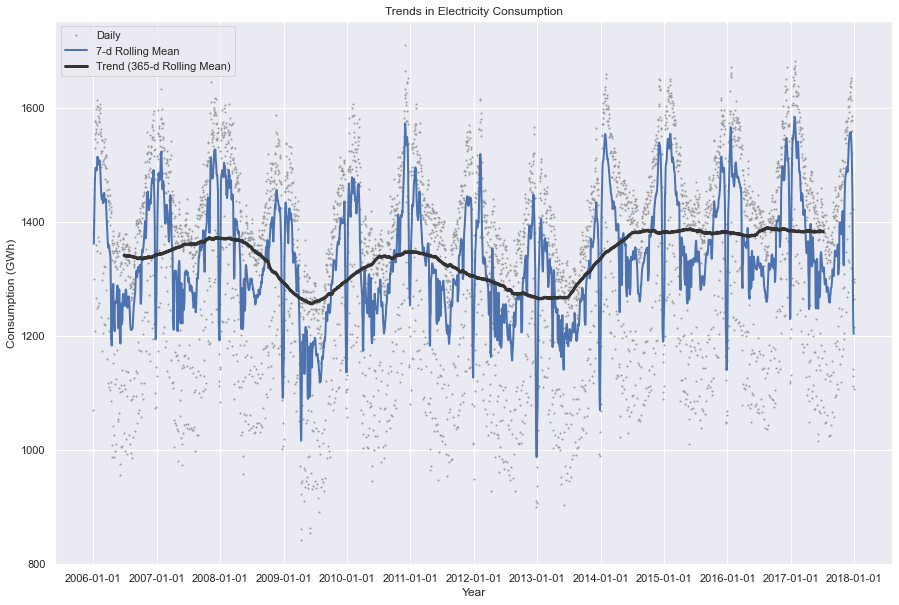

In [82]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
        linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
        label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

Trend of wind and solar production

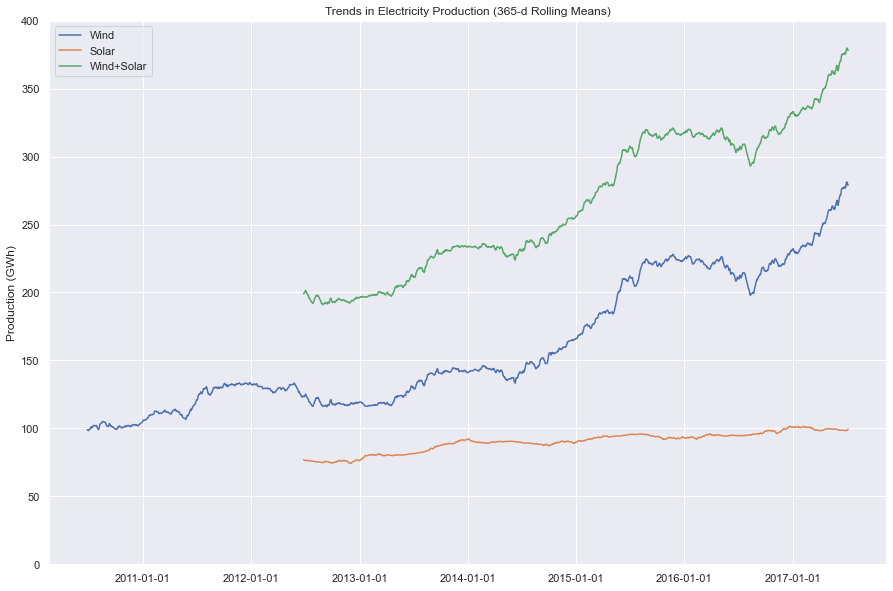

In [83]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');